<a href="https://colab.research.google.com/github/thanhnt19146391/study/blob/main/Prepare_datasets_89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare dataset

Connect your drive with your email

In [46]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Set your training folder which contains images

In [47]:
data_root = "/content/drive/MyDrive/Colab Notebooks/AI/CNN_Execises/Face_detection/training"

Create data generator for training and validation

In [50]:
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (150, 150)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR)
# Create dictionary containing rescale and validation_split
datagen_kwargs = dict(rescale = 1. / 255, validation_split = 0.2)
valid_datagen = ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset = "validation",
    target_size = IMAGE_SHAPE,
    shuffle = True,
    batch_size = 64
)
train_datagen = ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    target_size = IMAGE_SHAPE,
    subset = "training",
    batch_size = 64
)

/content/drive/MyDrive/Colab Notebooks/AI/CNN_Execises/Face_detection/training
Found 643 images belonging to 21 classes.
Found 2614 images belonging to 21 classes.


Learn more about data batch

In [51]:
import numpy as np
image_batch_train, label_batch_train = next(iter(train_generator))
print('Image batch train shape: ', image_batch_train.shape)
print('Label batch train shape: ', label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key = lambda pair: pair[1])
dataset_labels = np.array([key.title() for key, _ in dataset_labels])
print(dataset_labels)
print("Number of classes: ",train_generator.num_classes)
print('Batch size: ',train_generator.batch_size)
print('Samples: ',train_generator.samples)

Image batch train shape:  (64, 150, 150, 3)
Label batch train shape:  (64, 21)
['Bi' 'Bo' 'Do Mixi' 'Duc' 'Dung' 'Loi' 'My Tam' 'Shark Binh'
 'Shark Dzung' 'Shark Hung' 'Shark Lien' 'Shark Linh' 'Shark Louis'
 'Shark Phu' 'Shark Viet' 'Someone' 'Thanh' 'Thuy Tien' 'Tieu Vy' 'Vinh'
 'Xemesis']
Number of classes:  21
Batch size:  64
Samples:  2614


# Training


In [52]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten, BatchNormalization
# Build model
model = Sequential()
# 1st block
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(train_generator.num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                      

Compile our model

In [53]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = SGD(),
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

Train our model

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_loss', patience = 5)
hist = model.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator).history

Epoch 1/20
41/41 [==============================] - 10s 210ms/step - loss: 3.1402 - accuracy: 0.7211 - val_loss: 2.2351 - val_accuracy: 0.3079
Epoch 2/20
41/41 [==============================] - 7s 179ms/step - loss: 0.2396 - accuracy: 0.9304 - val_loss: 2.0349 - val_accuracy: 0.4992
Epoch 3/20
41/41 [==============================] - 7s 178ms/step - loss: 0.0782 - accuracy: 0.9816 - val_loss: 1.7541 - val_accuracy: 0.5941
Epoch 4/20
41/41 [==============================] - 7s 174ms/step - loss: 0.0242 - accuracy: 0.9981 - val_loss: 1.3938 - val_accuracy: 0.6719
Epoch 5/20
41/41 [==============================] - 7s 177ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.9968 - val_accuracy: 0.7558
Epoch 6/20
41/41 [==============================] - 7s 174ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.8073 - val_accuracy: 0.7916
Epoch 7/20
41/41 [==============================] - 7s 174ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6718 - val_accuracy: 0.8336
Epoch

Notification

In [13]:
from google.colab import output
output.eval_js('new Audio("https://www.soundjay.com/nature/sounds/rain-01.mp3").play()')

Measure accuracy and loss after training

In [55]:
final_loss, final_accuracy = model.evaluate(valid_generator)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))

11/11 [==============================] - 2s 140ms/step - loss: 0.4821 - accuracy: 0.8942
Final loss: 0.48
Final accuracy: 89.42%


Plot history

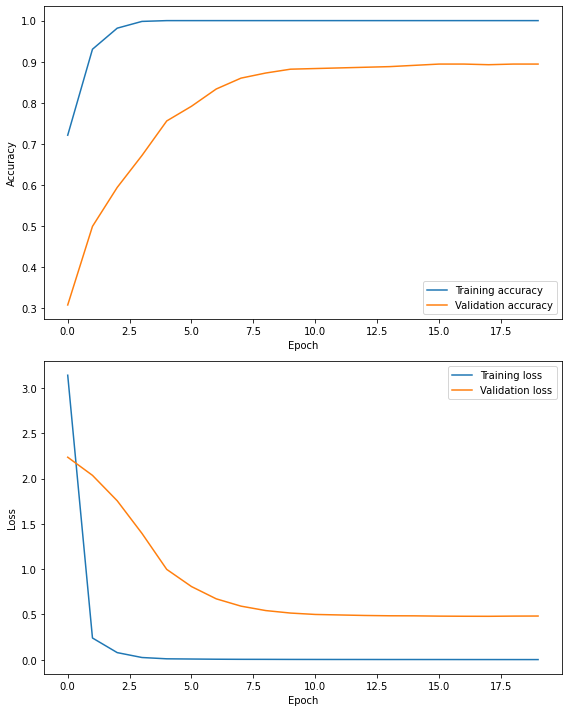

In [56]:
import pandas as pd
import matplotlib.pylab as plt
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['accuracy'], label = 'Training accuracy')
ax1.plot(np.arange(0, epochs), model_history['val_accuracy'], label = 'Validation accuracy')
ax1.legend(loc = 'lower right')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'Training loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

Save model

In [57]:
PATH = "/content/drive/MyDrive/Colab Notebooks/AI/"
MODEL_NAME = "Model" + str(round(final_accuracy * 100)) + ".h5"
model.save(PATH + MODEL_NAME)

Load saved model

# Check predictions

In [58]:
from keras.models import load_model
model = load_model(PATH + MODEL_NAME)

Get images and labels batch from vadidation generator

In [68]:
val_img_batch, val_label_batch = next(iter(valid_generator))
print('Validation imgage batch shape: ', val_img_batch.shape)
print('Validation label batch shape: ', val_label_batch.shape)

true_label_ids = np.argmax(val_label_batch, axis = 1)
print(true_label_ids)

Validation imgage batch shape:  (64, 150, 150, 3)
Validation label batch shape:  (64, 21)
[18  5  7  1 12 15  7  6 13  5  6 12  6 20  8  0 17 13 13 17 13 17 16 20
 18  4 20 15  1 13  1 13  1 11 19 14  9  6 16 17 20 11 20 14  1 15  4  5
  8  2 20  7  9  6  6 11  1 20 10  9  3  6  1 12]


Calculate predictions for the entire batch

In [69]:
predictions = model.predict(val_img_batch)
print('Prediction results shape: ', predictions.shape)

Prediction results shape:  (64, 21)


Convert prediction to Pandas dataframe, for better visualizaton

In [70]:
import pandas as pd
pred_dataframe = pd.DataFrame(predictions)
pred_dataframe.columns = dataset_labels

Print images batch and label predictions

In [71]:
pred_ids = np.argmax(predictions, axis = 1)
print(pred_ids)
pred_labels = dataset_labels[pred_ids]
print(pred_labels)

[18 20  7  1 12  7  7  6 13  1  6 20  6 20  8  0 17 13 13  7 13 17 16  9
 18  4 20 12  1 13  1 13  1 11 19 14  9  6 16  7 20 11 20 14  1 12 15  5
  8  2 20  7  9  6  6 11  1 20 10 15  3  6  1  9]
['Tieu Vy' 'Xemesis' 'Shark Binh' 'Bo' 'Shark Louis' 'Shark Binh'
 'Shark Binh' 'My Tam' 'Shark Phu' 'Bo' 'My Tam' 'Xemesis' 'My Tam'
 'Xemesis' 'Shark Dzung' 'Bi' 'Thuy Tien' 'Shark Phu' 'Shark Phu'
 'Shark Binh' 'Shark Phu' 'Thuy Tien' 'Thanh' 'Shark Hung' 'Tieu Vy'
 'Dung' 'Xemesis' 'Shark Louis' 'Bo' 'Shark Phu' 'Bo' 'Shark Phu' 'Bo'
 'Shark Linh' 'Vinh' 'Shark Viet' 'Shark Hung' 'My Tam' 'Thanh'
 'Shark Binh' 'Xemesis' 'Shark Linh' 'Xemesis' 'Shark Viet' 'Bo'
 'Shark Louis' 'Someone' 'Loi' 'Shark Dzung' 'Do Mixi' 'Xemesis'
 'Shark Binh' 'Shark Hung' 'My Tam' 'My Tam' 'Shark Linh' 'Bo' 'Xemesis'
 'Shark Lien' 'Someone' 'Duc' 'My Tam' 'Bo' 'Shark Hung']


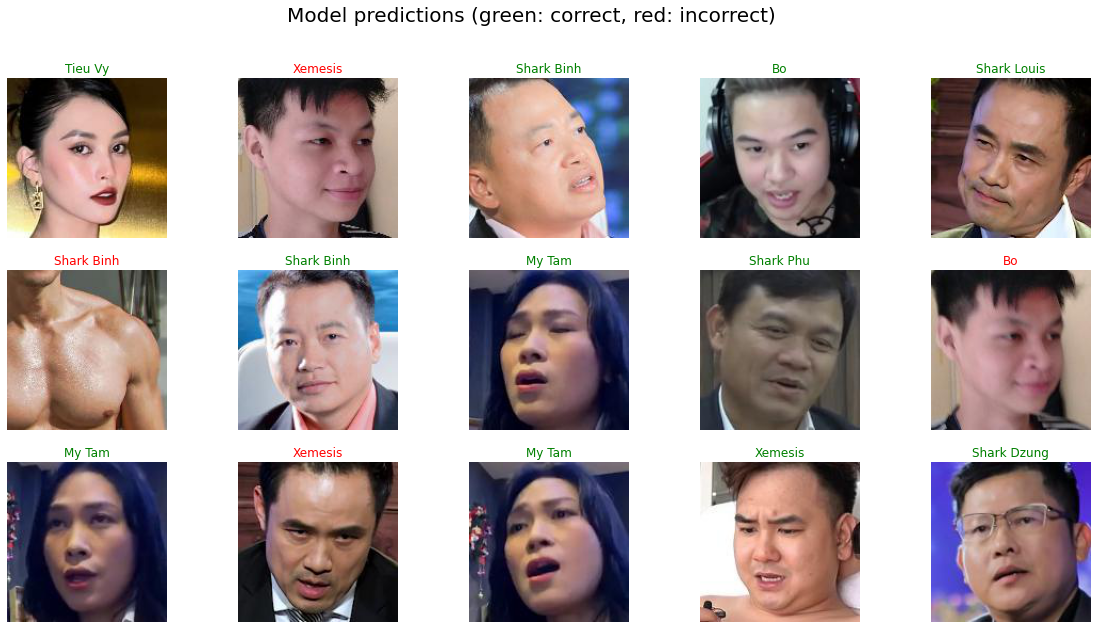

In [72]:
import matplotlib.pylab as plt
plt.figure(figsize = (20, 10))
plt.subplots_adjust(hspace = .2)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(val_img_batch[i])
    color = "green" if true_label_ids[i] == pred_ids[i] else 'red'
    plt.title(pred_labels[i].title(), color = color)
    plt.axis('off')
_ = plt.suptitle('Model predictions (green: correct, red: incorrect)', size = 20)